In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

In [2]:
uploaded = files.upload()
filename = next(iter(uploaded))

# Loading the labelled_comments.csv file into a pandas DataFrame
comments_df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Checking for metadata, basic statistics, duplicates.
comments_df.info()

Saving labeled_comments.csv to labeled_comments.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5191 entries, 0 to 5190
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   file_id                      4991 non-null   object 
 1   comment_id                   5191 non-null   object 
 2   comment_date                 5191 non-null   object 
 3   anonymized_nickname          5176 non-null   object 
 4   document_paragraph_text      4700 non-null   object 
 5   document_selected_text       4181 non-null   object 
 6   document_selected_sentences  5165 non-null   float64
 7   comment_full_text            5191 non-null   object 
 8   comment_sentence_text        5191 non-null   object 
 9   is_sentence                  5191 non-null   int64  
 10  num_sentence                 5191 non-null   int64  
 11  total_sentences              5191 non-null   int64  
 12  grammar_checked         

In [3]:
# Checking for duplicates, and cleaning them.

duplicates = comments_df.duplicated().sum()
cleaned_data = comments_df.drop_duplicates()

# Now, populating the first 30 entries from the cleaned_data
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(cleaned_data.head(30).to_string())


                                 file_id                            comment_id               comment_date         anonymized_nickname                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

# 1.1) What is the unit of Analysis?

Referring the Dataframe ***cleaned_data***, it is clear that the unit of analysis is ***individual comments*** in collaborative documents. We have conlcuded this by going through the structure of the dataset, where each row corresponds to a comment.

In [4]:
columns_to_display = [
    'comment_id',
    'comment_date',
    'comment_full_text',
    'comment_sentence_text',
    'grammar_checked',
    'spelling_checked',
    'tracked_changes'
]

for column in columns_to_display:
    print(column)


comment_id
comment_date
comment_full_text
comment_sentence_text
grammar_checked
spelling_checked
tracked_changes


In [5]:
# converting comment_date(which is a 'string' in the data) to datetime, which would provide flexibility and accuracy for time-based analysis

cleaned_data = cleaned_data.copy()
cleaned_data['comment_date'] = pd.to_datetime(cleaned_data['comment_date'], utc=True, errors='coerce')

time_period = (cleaned_data['comment_date'].min(), cleaned_data['comment_date'].max())

# Calculating total and unique observations
total_observations = len(cleaned_data)
unique_observations = len(cleaned_data.drop_duplicates(subset=['comment_id']))

observations=total_observations + duplicates

In [6]:
# Summary of the initial cleaning steps.

summary = {
    "total_observations": observations,
    "total_observations (without duplicates)": total_observations,
    "unique_observations": unique_observations,
    "time_period": time_period,
    "duplicates_removed": duplicates
}

print("Summary: ")
for key, value in summary.items():
    print(f"{key}: {value}")


Summary: 
total_observations: 5191
total_observations (without duplicates): 5190
unique_observations: 2682
time_period: (Timestamp('1899-11-30 00:00:00+0000', tz='UTC'), Timestamp('2020-04-20 15:40:00+0000', tz='UTC'))
duplicates_removed: 1


In [7]:
summary = {
    "Duplicates Removed": "1 duplicate row was removed.",
    "Date Handling": "The comment_date dataframe is converted to datetime, and any invalid dates were handled."
}

print("Brief Summary of Data Cleaning Steps:")
for key, value in summary.items():
    print(f"{key}: {value}")


Brief Summary of Data Cleaning Steps:
Duplicates Removed: 1 duplicate row was removed.
Date Handling: The comment_date dataframe is converted to datetime, and any invalid dates were handled.


# 1.2) How many observations in total are in the dataset? How many unique observations are in the data set?

Going through the ***summary*** above, there are **5191** *total observartions* and **2682** unique *observations*. We have only considered unique comment ids, which gave us 2682 observations.

# 1.3) What time period is covered?

Time period covered in the dataset - ***November 30, 1899,*** to ***April 20, 2020.***.

# 2) Brief summary of any data cleaning steps you have performed. For example,are there any particular observations / time periods / groups / etc. you have excluded?

*   **Duplicates Removed**: 1 duplicate row was removed.
*   **Date Handling**: The ***comment_date*** dataframe is converted to datetime, and any invalid dates were handled.



<ipython-input-8-5de9abec7519>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outcome_df, x='Outcome', y='Count', palette=sns.color_palette("coolwarm", len(outcome_df)))


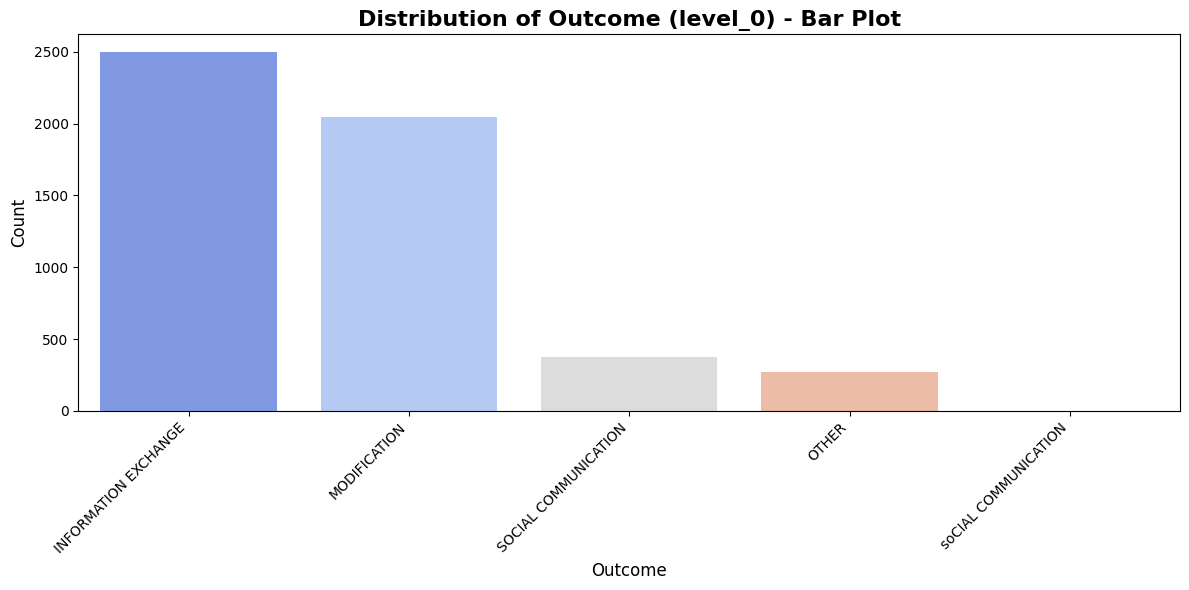

In [8]:
# For visualizing the data using a bar plot, and also through piechart, I have used 'Level-0' column, since I found it to be a potential variable, with very less NaN values.

outcome_counts = cleaned_data['level_0'].value_counts()
outcome_df = pd.DataFrame({'Outcome': outcome_counts.index, 'Count': outcome_counts.values})

plt.figure(figsize=(12, 6))
sns.barplot(data=outcome_df, x='Outcome', y='Count', palette=sns.color_palette("coolwarm", len(outcome_df)))
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Outcome (level_0) - Bar Plot', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Outcome', fontsize=12)
plt.tight_layout()
plt.show()

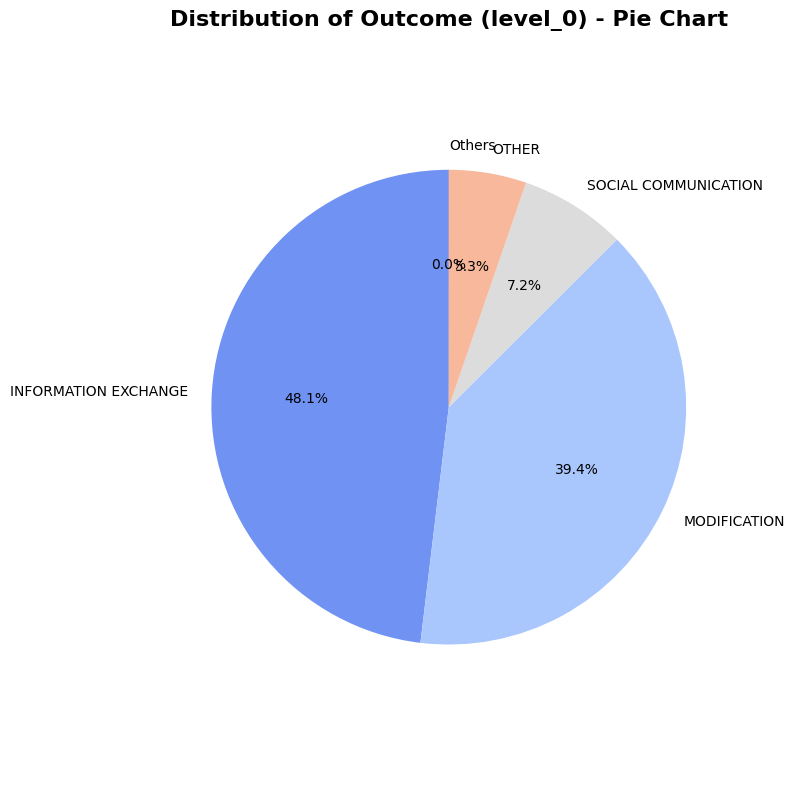

In [9]:
# Plotting the outcome distribution - Pie Chart


threshold = 0.02 * sum(outcome_counts.values)
outcome_counts_small = outcome_counts[outcome_counts < threshold].sum()
outcome_counts_large = outcome_counts[outcome_counts >= threshold]
outcome_counts_large['Others'] = outcome_counts_small


plt.figure(figsize=(8, 8))
plt.pie(outcome_counts_large.values, labels=outcome_counts_large.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('coolwarm', len(outcome_counts_large)), textprops={'fontsize': 10})
plt.title('Distribution of Outcome (level_0) - Pie Chart', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3) Description of outcome with an appropriate visualization technique.

*   The outcome is described by the level_0 column.
*   The bar plot and pie chart provide appropriate visualizations showing how the outcomes are distributed in terms of counts and proportions.



<ipython-input-10-825c95a7fb2b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='level_0', y='spelling_errors', data=cleaned_data, palette='coolwarm', width=0.6, showfliers=True)


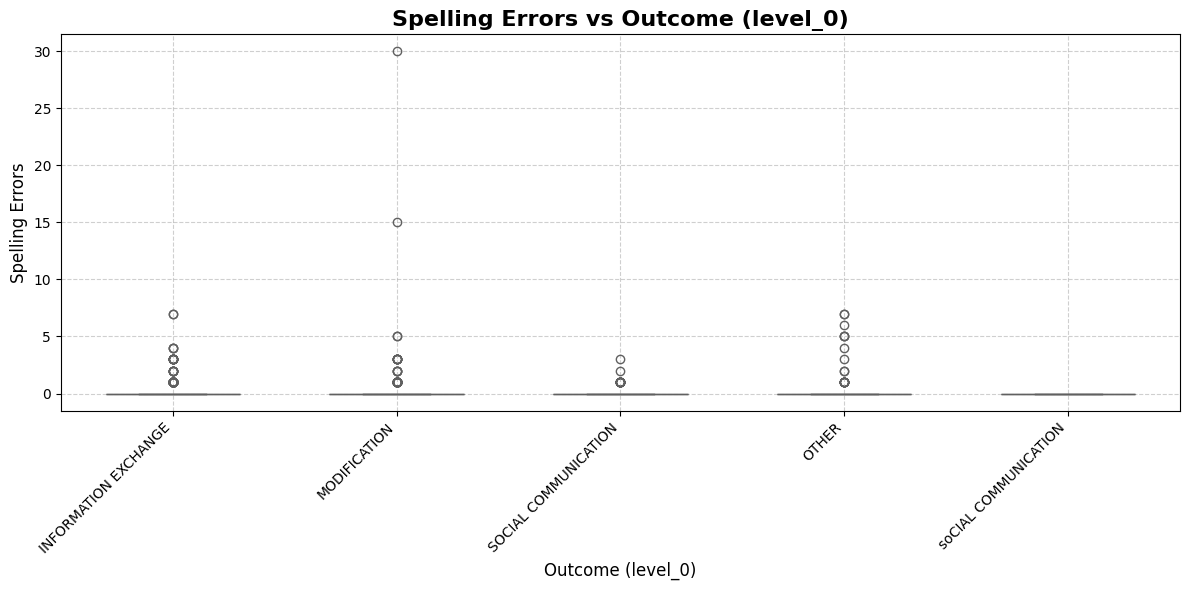

In [10]:
# Visualizing key predictors: Let's investigate 'spelling_errors' and 'tracked_changes' as key predictors

plt.figure(figsize=(12, 6))
sns.boxplot(x='level_0', y='spelling_errors', data=cleaned_data, palette='coolwarm', width=0.6, showfliers=True)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating and adjusting x-ticks for readability
plt.title('Spelling Errors vs Outcome (level_0)', fontsize=16, fontweight='bold')  # Bold title
plt.xlabel('Outcome (level_0)', fontsize=12)  # X-axis label
plt.ylabel('Spelling Errors', fontsize=12)  # Y-axis label
plt.grid(True, linestyle='--', alpha=0.6)  # Adding grid for better readability
plt.tight_layout()  # Adjust layout to fit everything properly
plt.show()


<ipython-input-11-5e1337805acb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='level_0', y='tracked_changes', data=cleaned_data, palette='coolwarm', width=0.6, showfliers=True)


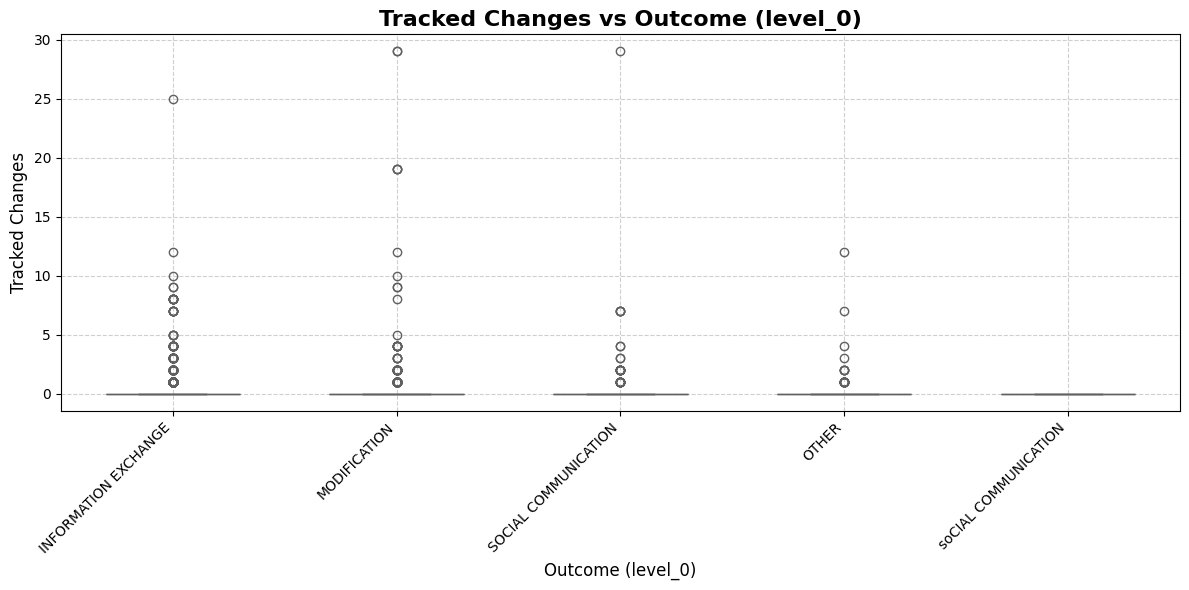

In [11]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='level_0', y='tracked_changes', data=cleaned_data, palette='coolwarm', width=0.6, showfliers=True)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating and adjusting x-ticks for readability
plt.title('Tracked Changes vs Outcome (level_0)', fontsize=16, fontweight='bold')  # Bold title
plt.xlabel('Outcome (level_0)', fontsize=12)  # X-axis label
plt.ylabel('Tracked Changes', fontsize=12)  # Y-axis label
plt.grid(True, linestyle='--', alpha=0.6)  # Adding grid for better readability
plt.tight_layout()  # Adjust layout to fit everything properly
plt.show()


# 4) Description of key predictors with appropriate visualization techniques that compare predictors to the response. You should investigate all predictors in your data as part of your project. For the purpose of this assignment, pick the one or two predictors that you think are going to be most important in explaining the outcome. Your selection of predictors can either be guided by your domain knowledge or be the result of your EDA on all predictors.


*   **Two key predictors were chosen**: spelling_errors and tracked_changes.
*   Box Plots were used to visualize how each of these predictors varies across the different outcome categories (level_0), these are compared to the outcome using box plots, making it easy to observe any patterns or relationships.
*   **Visualization**: These plots allow for easy comparison of the distribution of spelling errors and tracked changes across different outcome categories.





